### Fighting Obesity in Toronto : Opening Gyms in At-Risk Reighborhoods ###

In [134]:
import numpy as np
from builtins import str

In [205]:
!conda install -c conda-forge geocoder --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/yacine/miniconda2/envs/p36workshop

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

  geocoder           conda-forge/noarch::geocoder-1.38.1-py_1
  ratelim            conda-forge/noarch::ratelim-0.1.6-py_2



ratelim-0.1.6        | 6 KB      | ##########################

In [355]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import math
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt

In [2]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium --yes
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [206]:
import geocoder

###  Build the dataframe containing health data ###

In [528]:
# Importing Health data from Urban Health dataset 
health_df = pd.read_excel('UrbanHeart_MatrixData.xlsx')

In [530]:
health_df = health_df[['Neighborhood','Walk score','Diabetes']]

In [531]:
health_df['Diabetes'].replace('(H|L)','',regex=True,inplace=True)

In [532]:
health_df.head(10)

,Neighborhood,Walk score,Diabetes
0,Agincourt North,66.0,9.5
1,Agincourt South-Malvern West,66.0,9.5
2,Alderwood,70.0,8.5
3,Annex,94.0,5.5
4,Banbury-Don Mills,67.0,6.5
5,Bathurst Manor,61.0,8.5
6,Bay Street Corridor,99.0,5.1
7,Bayview Village,71.0,6.0
8,Bayview Woods-Steeles,57.0,7.1
9,Bedford Park-Nortown,73.0,5.6


### Getting Localisation data from geopy ###

In [533]:
geolocator = Nominatim(user_agent="toronto_explorer")
Lat = []
Long = []
for neighb in health_df['Neighborhood']:
    address = neighb
    location = geolocator.geocode(address,country_codes='CA')
    if (location is not None):
        location = geolocator.geocode(address,country_codes='CA')
        Lat.append(location.latitude)
        Long.append(location.longitude)
    else:
        Lat.append(float('nan'))
        Long.append(float('nan'))

In [534]:
health_df['Latitude'] = Lat
health_df['Longitude'] = Long

### Cleaning up dataset  ###

In [536]:
health_df.dropna(inplace = True)

In [537]:
health_df['Diabetes']= health_df['Diabetes'].astype('float')

In [539]:
health_df.head(10)

,Neighborhood,Walk score,Diabetes,Latitude,Longitude
0,Agincourt North,66.0,9.5,43.808038,-79.266439
2,Alderwood,70.0,8.5,43.601717,-79.545232
3,Annex,94.0,5.5,43.670338,-79.407117
4,Banbury-Don Mills,67.0,6.5,43.751672,-79.370169
5,Bathurst Manor,61.0,8.5,43.665519,-79.411937
6,Bay Street Corridor,99.0,5.1,43.672798,-79.390734
7,Bayview Village,71.0,6.0,43.769197,-79.376662
8,Bayview Woods-Steeles,57.0,7.1,43.798127,-79.382973
11,Bendale,64.0,11.5,43.753520,-79.255336
13,Black Creek,62.0,12.7,45.622607,-77.156242


### Getting location data using Foursquare API ###

In [ ]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Toronto are {}, {}.'.format(latitude, longitude))


In [ ]:
# We're going to visualize the map of Toronto and its neighborhoods
# Creating the map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, borough, neighbourhood in zip(df_2['Latitude'], df_2['Longitude'], df_2['Borough'], df_2['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Toronto)  

In [ ]:
map_Toronto

In [460]:
#Initializing Foursquare API Credentials
CLIENT_ID = 'RF2HLDBFJ0Z0IAOHHOTQG4CMUCDM0RGVAF3DVCQFD153FMOB'
CLIENT_SECRET = '2LYBEQRR5TXMPQWUFKMLWCIKWVOA2G3U3Y1YCYL20MWXKRHJ'
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [466]:
#get number of gyms, parks, pools, and fast food restaurants nearby each neighborhood 

Nb_Gyms = []
Nb_Parks =[]
Nb_FF  = []
Nb_Pools = []
radius = 500
for name, lat, lng in zip(health_df['Neighborhood'],health_df['Latitude'],health_df['Longitude']):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT,
            "gym") 
#         # make the GET request
        results_gym = requests.get(url).json()
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            "park") 
        # make the GET request
        results_park = requests.get(url).json()
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT,
             "pool") 
        # make the GET request
        results_pool = requests.get(url).json()
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
            LIMIT,
            "fast food") 
        results_fastfood = requests.get(url).json()
        Nb_Gyms.append(results_gym['response']['totalResults'])
        Nb_Parks.append(results_park['response']['totalResults']) 
        Nb_FF.append(results_fastfood['response']['totalResults']) 
        Nb_Pools.append(results_pool['response']['totalResults']) 
health_df['Gyms'] = Nb_Gyms
health_df['Parks'] = Nb_Parks
health_df['FastFood'] = Nb_FF
health_df['Pools'] = Nb_Pools
 

In [545]:
health_df.head(10)

,Neighborhood,Walk score,Diabetes,Latitude,Longitude,Gyms,Parks,FastFood,Pools
0,Agincourt North,66.0,9.5,43.808038,-79.266439,0,0,4,0
2,Alderwood,70.0,8.5,43.601717,-79.545232,1,0,1,1
3,Annex,94.0,5.5,43.670338,-79.407117,3,3,4,1
4,Banbury-Don Mills,67.0,6.5,43.751672,-79.370169,0,1,0,0
5,Bathurst Manor,61.0,8.5,43.665519,-79.411937,7,2,5,1
6,Bay Street Corridor,99.0,5.1,43.672798,-79.390734,21,6,7,8
7,Bayview Village,71.0,6.0,43.769197,-79.376662,0,0,2,0
8,Bayview Woods-Steeles,57.0,7.1,43.798127,-79.382973,0,0,0,0
11,Bendale,64.0,11.5,43.753520,-79.255336,0,2,1,0
13,Black Creek,62.0,12.7,45.622607,-77.156242,0,0,0,0


### Clustering Neighborhoods###

Text(0, 0.5, 'Silhouette Score')

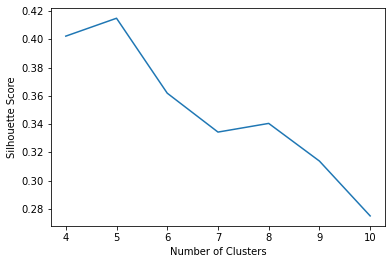

In [566]:
#Determining optimal number of clusters using silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

health_df_clustering = health_df.drop(['Neighborhood','Latitude','Longitude'],1)
scores = []
for kclusters in range(4,11):
    predictions = KMeans(n_clusters=kclusters).fit_predict(health_df_clustering)
    scores.append(silhouette_score(health_df_clustering,predictions))
plt.plot(range(4,11),scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [567]:
#Selecting optimal cluster number
kclusters =5

In [568]:
# Building and Fitting K-means model 
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(health_df_clustering)

In [573]:
# Add clustering labels
health_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [574]:
health_df.head(10)

,Cluster Labels,Neighborhood,Walk score,Diabetes,Latitude,Longitude,Gyms,Parks,FastFood,Pools
0,1,Agincourt North,66.0,9.5,43.808038,-79.266439,0,0,4,0
2,0,Alderwood,70.0,8.5,43.601717,-79.545232,1,0,1,1
3,2,Annex,94.0,5.5,43.670338,-79.407117,3,3,4,1
4,0,Banbury-Don Mills,67.0,6.5,43.751672,-79.370169,0,1,0,0
5,1,Bathurst Manor,61.0,8.5,43.665519,-79.411937,7,2,5,1
6,4,Bay Street Corridor,99.0,5.1,43.672798,-79.390734,21,6,7,8
7,0,Bayview Village,71.0,6.0,43.769197,-79.376662,0,0,2,0
8,1,Bayview Woods-Steeles,57.0,7.1,43.798127,-79.382973,0,0,0,0
11,1,Bendale,64.0,11.5,43.753520,-79.255336,0,2,1,0
13,1,Black Creek,62.0,12.7,45.622607,-77.156242,0,0,0,0


### Results ###

In [575]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# Visualising Clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(health_df['Latitude'], health_df['Longitude'], health_df['Neighborhood'], health_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [576]:
#Examining Cluster 1 
C = health_df.loc[health_df['Cluster Labels'] == 0,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 1 ')
print(C.mean(0,numeric_only=True))

Cluster 1 
Walk score    72.975610
Diabetes       8.287805
Gyms           0.853659
Parks          1.195122
FastFood       1.853659
Pools          0.195122
dtype: float64


In [581]:
#Examining Cluster 2
C = health_df.loc[health_df['Cluster Labels'] ==1,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 2 ')
print(C.mean(0,numeric_only=True))

Cluster 2 
Walk score    59.617647
Diabetes      10.617647
Gyms           0.529412
Parks          0.647059
FastFood       1.529412
Pools          0.088235
dtype: float64


# Cluster 2 Is in dire need of gyms !!! # 

In [578]:
#Examining Cluster 3
C = health_df.loc[health_df['Cluster Labels'] ==2,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 3 ')
print(C.mean(0,numeric_only=True))

Cluster 3 
Walk score    88.266667
Diabetes       7.243333
Gyms           2.633333
Parks          1.800000
FastFood       2.800000
Pools          0.600000
dtype: float64


In [579]:
#Examining Cluster 4
C = health_df.loc[health_df['Cluster Labels'] ==3,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 4 ')
print(C.mean(0,numeric_only=True))

Cluster 4 
Walk score    60.0
Diabetes       5.7
Gyms          22.0
Parks          8.0
FastFood      44.0
Pools         13.0
dtype: float64


In [580]:
#Examining Cluster 5
C = health_df.loc[health_df['Cluster Labels'] ==4,health_df.columns[[1,2,3,6,7,8,9]]]
print('Cluster 5 ')
print(C.mean(0,numeric_only=True))

Cluster 5 
Walk score    97.333333
Diabetes       6.466667
Gyms          20.000000
Parks          5.666667
FastFood      11.000000
Pools          6.666667
dtype: float64
